# <center>Machine Intelligence 1</center>

<h2 align="right">Exercise Sheet 03</h2> 

<pre style="text-align: right">
Gruppe:             
                MeSi
Autoren:            
Jens Meiners
Arne Siebenmorgen
</pre>

#### 3.1 MLP Backpropagation (5 points)

In [10]:
# imports 
import numpy as np
from numpy import tanh
from numpy.random import random

In [13]:
# basic functions
def d_tanh(x):
    """
    the differentiated function of tanh
    """
    return 1.0 - np.power(tanh(x),2)

def rand(shape):
    """
    returns a matrix of given shape with random entries in [-0.5,0.5)
    """
    return random(shape)-0.5

def to_matrix(x):
    return np.atleast_2d(x)

In [88]:
class MLP:

    def __init__(self, layers):
        """
        initialize with a construction plan like [1,3,1] denoting
        one input node, three nodes in the hidden layer and one output node
        """
        # preparing bias weights - add one to every layer but the last.
        layers = [layers[i] + 1 for i in range(len(layers))]
        layers[-1] -= 1
        # initialize weights
        self.w = [rand((layers[i], layers[i+1])) for i in range(len(layers) - 1)]

    def fit(self, X, y, alpha=0.2, eta=10000):
        # for X of shape 2x3 we want to add another column of ones to
        # the front resulting in X of shape 2x4 with X[:,0] = 1
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        
        for k in range(eta):
            # pick a random example
            i = np.random.randint(X.shape[0])
            # forst feedforward input is the input layer fpr this pick
            feed = [X[i]]
            for l in range(len(self.w)):
                # feed forward, append this layers result for next iterations input
                feed.append(tanh(np.dot(feed[l], self.w[l])))
            res = feed[-1]
            
            # find error; delta
            e = y[i] - res
            d = [e * d_tanh(res)]

            # start right before the ouput layer, iterating backwards to 0
            for l in range(len(feed) - 2, 0, -1): 
                d.append(d[-1].dot(self.w[l].T) * d_tanh(feed[l]))

            # weight update
            for i in range(len(self.w)):
                self.w[i] += alpha * to_matrix(feed[i]).T.dot(to_matrix(d[::-1][i]))
                
            if k % 1000 == 0: print 'error:', e

    def predict(self, x): 
        feed = np.concatenate((np.ones(1).T, np.array(x)), axis=1)      
        for l in range(0, len(self.w)):
            feed = tanh(np.dot(feed, self.w[l]))
        return feed

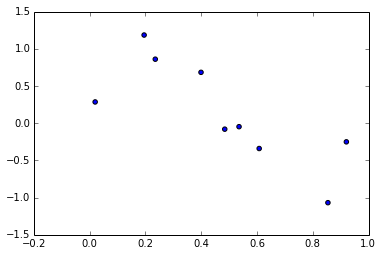

In [102]:
#TODO daten laden
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline

data = genfromtxt('RegressionData.txt', delimiter=' ', skip_header=1)

#print data

plt.scatter(data[:,0],data[:,1])

error: [ 0.73775355]
error: [ 0.24944617]
error: [-0.04418862]
error: [-0.03192432]
error: [-0.33998439]
error: [ 0.42453203]
error: [-0.36486557]
error: [-0.34238641]
error: [-0.00318661]
error: [ 0.11178532]


/home/jens/Programme/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: DeprecationWarning: axis != 0 for ndim == 1; this will raise an error in future versions of numpy


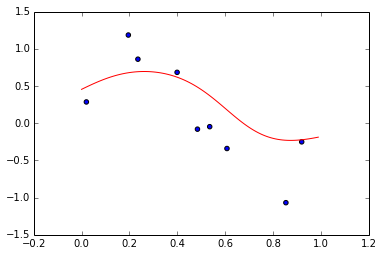

In [109]:
mlp = MLP([1,7,7,1])
X = to_matrix(data[:,0]).T
y = data[:,1]
mlp.fit(X, y,alpha=0.5,eta=9999)
pred = [mlp.predict([x]) for x in np.arange(0,1,0.01)]

plt.scatter(data[:,0],data[:,1])
plt.plot(np.arange(0,1,0.01),pred,c='r')

#### 3.2 Application to a simulated experiment (2 points)

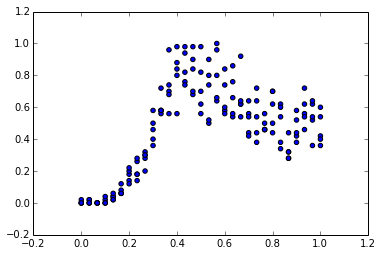

In [112]:
data = genfromtxt('simulatedRFmapping.csv', delimiter=',', skip_header=1)
# "normalizing"
data[:,0] = data[:,0] / max(data[:,0])
data[:,1] = data[:,1] / max(data[:,1])

#print data
plt.scatter(data[:,0],data[:,1])

error: [ 0.76329398]
error: [ 0.45707934]
error: [ 0.2829413]
error: [ 0.02091812]
error: [ 0.03344522]
error: [ 0.03079497]
error: [-0.16450649]
error: [ 0.15476091]
error: [-0.28960177]
error: [-0.15318333]


/home/jens/Programme/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: DeprecationWarning: axis != 0 for ndim == 1; this will raise an error in future versions of numpy


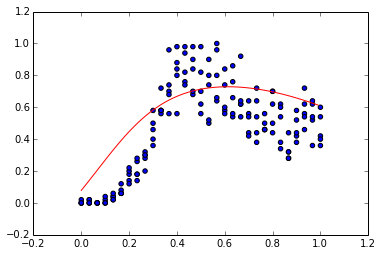

In [119]:
mlp = MLP([1,2,1])
X = to_matrix(data[:,0]).T
y = data[:,1]
mlp.fit(X, y,alpha=0.1,eta=9999)
pred = [mlp.predict([x]) for x in np.arange(0,1,0.01)]

plt.scatter(data[:,0],data[:,1])
plt.plot(np.arange(0,1,0.01),pred,c='r')

small number of hidden nodes results in simpler functions

error: [ 0.06728187]
error: [ 0.46715503]
error: [-0.04359928]
error: [ 0.26307088]
error: [ 0.03173475]
error: [ 0.18008166]
error: [ 0.09386707]
error: [ 0.24863791]
error: [ 0.10993915]
error: [-0.06258484]


/home/jens/Programme/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: DeprecationWarning: axis != 0 for ndim == 1; this will raise an error in future versions of numpy


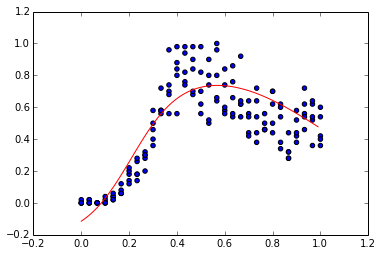

In [122]:
mlp = MLP([1,5,1])
X = to_matrix(data[:,0]).T
y = data[:,1]
mlp.fit(X, y,alpha=0.2,eta=9999)
pred = [mlp.predict([x]) for x in np.arange(0,1,0.01)]

plt.scatter(data[:,0],data[:,1])
plt.plot(np.arange(0,1,0.01),pred,c='r')

Still quite simple, but fitting the data way better

error: [ 0.41188399]
error: [-0.21715944]
error: [-0.05053868]
error: [-0.14485371]
error: [ 0.02070984]
error: [ 0.12388472]
error: [-0.02957246]
error: [ 0.04876218]
error: [-0.16545034]
error: [ 0.11550255]


/home/jens/Programme/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: DeprecationWarning: axis != 0 for ndim == 1; this will raise an error in future versions of numpy


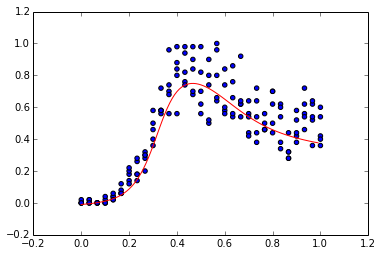

In [124]:
mlp = MLP([1,5,5,5,1])
X = to_matrix(data[:,0]).T
y = data[:,1]
mlp.fit(X, y,alpha=0.2,eta=9999)
pred = [mlp.predict([x]) for x in np.arange(0,1,0.01)]

plt.scatter(data[:,0],data[:,1])
plt.plot(np.arange(0,1,0.01),pred,c='r')

adding new hidden layers is the real fun